In [1]:
import numpy as np
import matplotlib.pyplot as plt
%cd /home/jeroen/repos/traffic-scheduling/
from network.generate_network import generate_grid_network
from network.util import draw_network, plot_schedule
from network.exact import solve

/home/jeroen/repos/traffic-scheduling


Generate a grid-like network with routes from west to east and from south to north (to align with the usual x-y coordinate system).

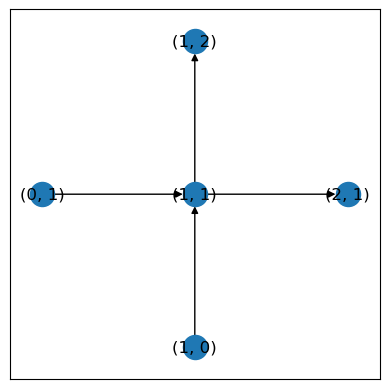

In [2]:
G, routes = generate_grid_network(1, 1)
draw_network(G)

Randomly generate vehicle arrivals and vehicle lengths.

In [3]:
vehicle_l = 2
vehicle_w = 1

N = len(routes)
n = [15 for _ in range(N)]

gap1 = 2
gap2 = 4

rng = np.random.default_rng()

def lane(n):
    length = np.repeat(vehicle_l, n)
    gaps = rng.uniform(gap1, gap2, size=(n))
    
    shifted = np.roll(length, 1); shifted[0] = 0
    release = np.cumsum(gaps + shifted)
    return release, length

releases, lengths = [], []
for l in range(N):
    rs, ls = lane(n[l])
    releases.append(rs); lengths.append(ls)

instance = {
    'G': G,
    'route': routes,
    'switch': vehicle_l - vehicle_w,
    'release': releases,
    'length': lengths,
}

Compute the optimal crossing times schedule by solving the network MILP.

Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-22
Set parameter MIPGap to value 0
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: 13th Gen Intel(R) Core(TM) i5-13600K, instruction set [SSE2|AVX|AVX2]
Thread count: 20 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 566 rows, 285 columns and 1552 nonzeros
Model fingerprint: 0x3c665251
Variable types: 60 continuous, 225 integer (225 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+03]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 1e+03]
Presolve removed 32 rows and 2 columns
Presolve time: 0.00s
Presolved: 534 rows, 283 columns, 1518 nonzeros
Variable types: 58 continuous, 225 integer (225 binary)
Found heuristic solution: objective 4663.2740487

Root relaxation: objective 3.138745e+03, 117 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Curr

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

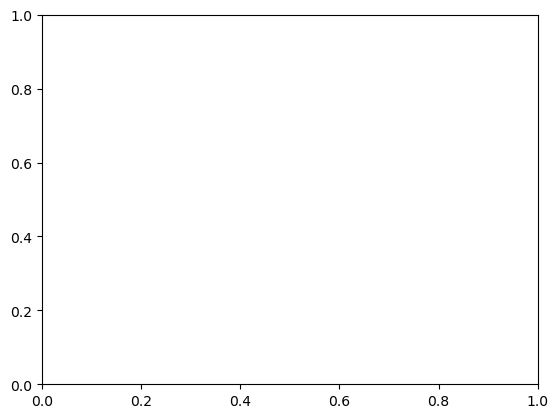

In [4]:
y, obj = solve(instance, consolelog=True, gap=0.00)
plot_schedule(instance, y)

Calculate the corresponding trajectories using the multi-checkpoint MotionSynthesize procedure and use these to generate a simple animation of the vehicle movements.

In [5]:
%%capture
from motion.motion import generate_trajectories
params = dict(vmax=1, umax=0.3, l=vehicle_l, dt=0.5)
trajectories = generate_trajectories(instance, y, params)

In [7]:
from motion.animation import animate
plt.rcParams["animation.html"] = "jshtml"
plt.ioff();
ani = animate(instance, trajectories, params['dt'], vehicle_l=vehicle_l)
ani.save(filename="grid.mp4", writer="ffmpeg")

NameError: name 'G' is not defined

In [12]:
trajectories[0][1][0]

np.float64(7.865021891201846)

In [ ]:
from network.util import draw_vehicles

draw_vehicles(G, routes, trajectories)